In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

data = pd.read_csv('bersihsam.csv')

In [ ]:
data

,created_at,full_text,location
0,2020-01-21,Aliran Dana Ilegal Capai 5% terhadap GDP globa...,"Jakarta Capital Region, Indone"
1,2020-01-21,Aliran Dana Ilegal Lintas Negara Capai 5% dari...,NaN
2,2020-01-21,Aliran Dana Ilegal Lintas Negara Capai 5% dari...,NaN
3,2020-09-14,Wah Think 20 (T20) mengusulkan negara-negara G...,"Jakarta, Indonesia"
4,2020-10-08,Iniii peralatan apaa hayooo....mau perang sama...,NaN
...,...,...,...
5423,2024-08-13,Tersangka Harvey Moeis segera menjalani sidang...,"Jakarta Capital Region, Indone"
5424,2024-08-22,Warga Desa Mentunai Sintang mempertanyakan tin...,NaN
5425,2024-09-03,Pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta"
5426,2024-09-03,KPK kepolisian dan kejaksaan sama-sama memilik...,"Jakarta Selatan, DKI Jakarta"


In [ ]:
# Cek missing value
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 created_at       0
full_text        0
location      1508
dtype: int64


In [ ]:
# Cek data duplikat
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:\n", duplicate_rows)


Duplicate rows:
       created_at                                          full_text  \
863   2022-12-29  Bagi publik transaksi misterius tapi bagi PPAT...   
958   2023-12-18  . . Gini ya Kawan-Kawan Guwa yang udah ke Sebe...   
1170  2024-09-14  Polresta Bengkulu usut Korupsi Dana Bos Rp1 2 ...   
1250  2022-12-27  Senin 26 Desember 2022 Kejaksaan Agung melalui...   
1252  2022-12-28  Selasa 27 Desember 2022 Kejaksaan Agung melalu...   
...          ...                                                ...   
5352  2024-03-27  Kejaksaan Agung (Kejagung) menetapkan suami da...   
5354  2024-09-05  Ketua KPK Nawawi Pomolango mengatakan dugaan g...   
5382  2024-09-02  Kejati DIY Tetapkan Mantan AO Bank BUMN di Ban...   
5393  2024-09-11  Eks Ketua KONI Sumsel Hendri Zainudin divonis ...   
5403  2024-09-03  Penanganan perkara dugaan tindak pidana korups...   

                          location  
863                      Indonesia  
958               Bermuda Triangle  
1170              

In [ ]:
# Menghapus data duplikat
df_clean = data.drop_duplicates()

print("DataFrame setelah menghapus data duplikat:")
print(df_clean)

DataFrame setelah menghapus data duplikat:
      created_at                                          full_text  \
0     2020-01-21  Aliran Dana Ilegal Capai 5% terhadap GDP globa...   
1     2020-01-21  Aliran Dana Ilegal Lintas Negara Capai 5% dari...   
2     2020-01-21  Aliran Dana Ilegal Lintas Negara Capai 5% dari...   
3     2020-09-14  Wah Think 20 (T20) mengusulkan negara-negara G...   
4     2020-10-08  Iniii peralatan apaa hayooo....mau perang sama...   
...          ...                                                ...   
5423  2024-08-13  Tersangka Harvey Moeis segera menjalani sidang...   
5424  2024-08-22  Warga Desa Mentunai Sintang mempertanyakan tin...   
5425  2024-09-03  Pembuktian terbalik merupakan suatu sistem pem...   
5426  2024-09-03  KPK kepolisian dan kejaksaan sama-sama memilik...   
5427  2024-09-03  100 legislator dari anggota DPRD Kabupaten Cil...   

                            location  
0     Jakarta Capital Region, Indone  
1                         

In [ ]:
id_stopword_dict = pd.read_csv('/content/gdrive/MyDrive/PROJEK LOMBA /PKMF 2024/stopwordbahasa.csv', encoding='latin-1')
id_stopword_dict1 = id_stopword_dict.rename(columns={0: 'stop'})
id_stopword_dict1.head()

,ada
0,adalah
1,adanya
2,adapun
3,agak
4,agaknya


In [ ]:
alay_dict = pd.read_csv('/content/gdrive/MyDrive/PROJEK LOMBA /PKMF 2024/new_kamusalay.csv', header=None, encoding='latin-1')
alay_dict = alay_dict.rename(columns={0: 'original',
                                     1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
alay_dict.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
# Read the CSV file and specify the separator as ';'
kamus_singkatan_deluxe = pd.read_csv('/content/gdrive/MyDrive/PROJEK LOMBA /PKMF 2024/kamus_singkatan_deluxe.csv', sep=';', encoding='latin-1')
# Set the column names
kamus_singkatan_deluxe.columns = ['Column1', 'Column2']
# Rename the columns correctly
alay_dict2 = kamus_singkatan_deluxe.rename(columns={'Column1': 'original', 'Column2': 'replacement'})
# Create a dictionary for mapping
alay_dict_map2 = dict(zip(alay_dict2['original'], alay_dict2['replacement']))
# Display the head of the renamed DataFrame
alay_dict2.head()

,original,replacement
0,adek,adik
1,adlh,adalah
2,aer,air
3,aiskrim,es krim
4,aj,saja


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
data.rename(columns={'full_text': 'tweet'}, inplace=True)

In [ ]:
data

,created_at,tweet,location
0,2020-01-21,Aliran Dana Ilegal Capai 5% terhadap GDP globa...,"Jakarta Capital Region, Indone"
1,2020-01-21,Aliran Dana Ilegal Lintas Negara Capai 5% dari...,NaN
2,2020-01-21,Aliran Dana Ilegal Lintas Negara Capai 5% dari...,NaN
3,2020-09-14,Wah Think 20 (T20) mengusulkan negara-negara G...,"Jakarta, Indonesia"
4,2020-10-08,Iniii peralatan apaa hayooo....mau perang sama...,NaN
...,...,...,...
5423,2024-08-13,Tersangka Harvey Moeis segera menjalani sidang...,"Jakarta Capital Region, Indone"
5424,2024-08-22,Warga Desa Mentunai Sintang mempertanyakan tin...,NaN
5425,2024-09-03,Pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta"
5426,2024-09-03,KPK kepolisian dan kejaksaan sama-sama memilik...,"Jakarta Selatan, DKI Jakarta"


In [ ]:
#merubah semua tipe data pada kolom ulasan menjadi string
data['tweet']= data['tweet'].astype(str)
#melakukan case folding berupa mengganti huruf besar menjadi kecil
data['tweet']= data['tweet'].str.lower()

In [ ]:
import string
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus email
    text = re.sub(r'\S+@\S+', '', text)

    # Menghapus tanggal (format yyyy-mm-dd)
    text = re.sub(r'\d{4}-\d{2}-\d{2}', '', text)

    # Menghapus URL
    text = re.sub(r'http\S+', '', text)

    # Menghapus HTML tag
    text = re.sub(r'<.*?>', '', text)

    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)

    # Menghapus mention
    text = re.sub(r'@\w+', '', text)

    # Menghapus tanda baca (punctuation)
    text = re.sub(r'\d', ' ', text)  # Mengganti angka dengan spasi

    # Menghapus emoji (emoticon)
    text = remove_emoji(text)

    # Menghapus karakter-karakter non-alphanumerik seperti *[ { [*
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Mengganti beberapa spasi ganda dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    #menghapus singgle chart
    text = re.sub(r'\b\w\b', '', text)

    return text

# Fungsi untuk menghapus emoji dari teks
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Contoh penggunaan pada kolom 'ulasan' pada dataframe
data['tweet'] = data['tweet'].apply(clean_text)

In [ ]:
data

,created_at,tweet,location
0,2020-01-21,aliran dana ilegal capai terhadap gdp global,"Jakarta Capital Region, Indone"
1,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN
2,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN
3,2020-09-14,wah think mengusulkan negaranegara untuk men...,"Jakarta, Indonesia"
4,2020-10-08,iniii peralatan apaa hayooomau perang sama sap...,NaN
...,...,...,...
5423,2024-08-13,tersangka harvey moeis segera menjalani sidang...,"Jakarta Capital Region, Indone"
5424,2024-08-22,warga desa mentunai sintang mempertanyakan tin...,NaN
5425,2024-09-03,pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta"
5426,2024-09-03,kpk kepolisian dan kejaksaan samasama memiliki...,"Jakarta Selatan, DKI Jakarta"


In [ ]:
from nltk.tokenize import word_tokenize

# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['data_tokenize']=data['tweet'].apply(word_tokenize_wrapper)
data

,created_at,tweet,location,data_tokenize
0,2020-01-21,aliran dana ilegal capai terhadap gdp global,"Jakarta Capital Region, Indone","[aliran, dana, ilegal, capai, terhadap, gdp, g..."
1,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ..."
2,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ..."
3,2020-09-14,wah think mengusulkan negaranegara untuk men...,"Jakarta, Indonesia","[wah, think, mengusulkan, negaranegara, untuk,..."
4,2020-10-08,iniii peralatan apaa hayooomau perang sama sap...,NaN,"[iniii, peralatan, apaa, hayooomau, perang, sa..."
...,...,...,...,...
5423,2024-08-13,tersangka harvey moeis segera menjalani sidang...,"Jakarta Capital Region, Indone","[tersangka, harvey, moeis, segera, menjalani, ..."
5424,2024-08-22,warga desa mentunai sintang mempertanyakan tin...,NaN,"[warga, desa, mentunai, sintang, mempertanyaka..."
5425,2024-09-03,pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta","[pembuktian, terbalik, merupakan, suatu, siste..."
5426,2024-09-03,kpk kepolisian dan kejaksaan samasama memiliki...,"Jakarta Selatan, DKI Jakarta","[kpk, kepolisian, dan, kejaksaan, samasama, me..."


In [ ]:
def normalize_alay(tokens):
    return [alay_dict_map[token] if token in alay_dict_map else token for token in tokens]

def normalize_alay2(tokens):
    return [alay_dict_map2[token] if token in alay_dict_map2 else token for token in tokens]

def norm(tokens):
    tokens = normalize_alay(tokens)  # Normalize tokens using alay_dict_map
    tokens = normalize_alay2(tokens)  # Normalize tokens using alay_dict_map2
    return tokens

data['data_normalisasi'] = data['data_tokenize'].apply(norm)


In [ ]:
data

,created_at,tweet,location,data_tokenize,data_normalisasi
0,2020-01-21,aliran dana ilegal capai terhadap gdp global,"Jakarta Capital Region, Indone","[aliran, dana, ilegal, capai, terhadap, gdp, g...","[aliran, dana, ilegal, capai, terhadap, gdp, g..."
1,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ...","[aliran, dana, ilegal, lintas, negara, capai, ..."
2,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ...","[aliran, dana, ilegal, lintas, negara, capai, ..."
3,2020-09-14,wah think mengusulkan negaranegara untuk men...,"Jakarta, Indonesia","[wah, think, mengusulkan, negaranegara, untuk,...","[wah, think, mengusulkan, negaranegara, untuk,..."
4,2020-10-08,iniii peralatan apaa hayooomau perang sama sap...,NaN,"[iniii, peralatan, apaa, hayooomau, perang, sa...","[iniii, peralatan, apa, hayooomau, perang, sam..."
...,...,...,...,...,...
5423,2024-08-13,tersangka harvey moeis segera menjalani sidang...,"Jakarta Capital Region, Indone","[tersangka, harvey, moeis, segera, menjalani, ...","[tersangka, harvey, moeis, segera, menjalani, ..."
5424,2024-08-22,warga desa mentunai sintang mempertanyakan tin...,NaN,"[warga, desa, mentunai, sintang, mempertanyaka...","[warga, desa, mentunai, sintang, mempertanyaka..."
5425,2024-09-03,pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta","[pembuktian, terbalik, merupakan, suatu, siste...","[pembuktian, terbalik, merupakan, suatu, siste..."
5426,2024-09-03,kpk kepolisian dan kejaksaan samasama memiliki...,"Jakarta Selatan, DKI Jakarta","[kpk, kepolisian, dan, kejaksaan, samasama, me...","[komisi pemberantasan korupsi, kepolisian, dan..."


In [ ]:
def remove_stopword(tokens):
    filtered_tokens = [token for token in tokens if token not in id_stopword_dict.ada.values]
    text = ' '.join(filtered_tokens)
    text = re.sub('  +', ' ', text)  # Remove extra spaces
    text = text.strip()
    return text

data['data_stopword'] = data['data_normalisasi'].apply(remove_stopword)

In [ ]:
data

,created_at,tweet,location,data_tokenize,data_normalisasi,data_stopword
0,2020-01-21,aliran dana ilegal capai terhadap gdp global,"Jakarta Capital Region, Indone","[aliran, dana, ilegal, capai, terhadap, gdp, g...","[aliran, dana, ilegal, capai, terhadap, gdp, g...",aliran dana ilegal capai gdp global
1,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ...","[aliran, dana, ilegal, lintas, negara, capai, ...",aliran dana ilegal lintas negara capai gdp global
2,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ...","[aliran, dana, ilegal, lintas, negara, capai, ...",aliran dana ilegal lintas negara capai gdp global
3,2020-09-14,wah think mengusulkan negaranegara untuk men...,"Jakarta, Indonesia","[wah, think, mengusulkan, negaranegara, untuk,...","[wah, think, mengusulkan, negaranegara, untuk,...",think mengusulkan negaranegara menghapus belan...
4,2020-10-08,iniii peralatan apaa hayooomau perang sama sap...,NaN,"[iniii, peralatan, apaa, hayooomau, perang, sa...","[iniii, peralatan, apa, hayooomau, perang, sam...",iniii peralatan hayooomau perang sapa sih tota...
...,...,...,...,...,...,...
5423,2024-08-13,tersangka harvey moeis segera menjalani sidang...,"Jakarta Capital Region, Indone","[tersangka, harvey, moeis, segera, menjalani, ...","[tersangka, harvey, moeis, segera, menjalani, ...",tersangka harvey moeis menjalani sidang terkai...
5424,2024-08-22,warga desa mentunai sintang mempertanyakan tin...,NaN,"[warga, desa, mentunai, sintang, mempertanyaka...","[warga, desa, mentunai, sintang, mempertanyaka...",warga desa mentunai sintang tindak lakjut koru...
5425,2024-09-03,pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta","[pembuktian, terbalik, merupakan, suatu, siste...","[pembuktian, terbalik, merupakan, suatu, siste...",pembuktian terbalik sistem pembuktian beban pe...
5426,2024-09-03,kpk kepolisian dan kejaksaan samasama memiliki...,"Jakarta Selatan, DKI Jakarta","[kpk, kepolisian, dan, kejaksaan, samasama, me...","[komisi pemberantasan korupsi, kepolisian, dan...",komisi pemberantasan korupsi kepolisian kejaks...


In [ ]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return stemmer.stem(text)
data['data_stemming'] = data['data_stopword'].apply(stem_text)

In [ ]:
data

,created_at,tweet,location,data_tokenize,data_normalisasi,data_stopword,data_stemming
0,2020-01-21,aliran dana ilegal capai terhadap gdp global,"Jakarta Capital Region, Indone","[aliran, dana, ilegal, capai, terhadap, gdp, g...","[aliran, dana, ilegal, capai, terhadap, gdp, g...",aliran dana ilegal capai gdp global,alir dana ilegal capai gdp global
1,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ...","[aliran, dana, ilegal, lintas, negara, capai, ...",aliran dana ilegal lintas negara capai gdp global,alir dana ilegal lintas negara capai gdp global
2,2020-01-21,aliran dana ilegal lintas negara capai dari gd...,NaN,"[aliran, dana, ilegal, lintas, negara, capai, ...","[aliran, dana, ilegal, lintas, negara, capai, ...",aliran dana ilegal lintas negara capai gdp global,alir dana ilegal lintas negara capai gdp global
3,2020-09-14,wah think mengusulkan negaranegara untuk men...,"Jakarta, Indonesia","[wah, think, mengusulkan, negaranegara, untuk,...","[wah, think, mengusulkan, negaranegara, untuk,...",think mengusulkan negaranegara menghapus belan...,think usul negaranegara hapus belanja paja dor...
4,2020-10-08,iniii peralatan apaa hayooomau perang sama sap...,NaN,"[iniii, peralatan, apaa, hayooomau, perang, sa...","[iniii, peralatan, apa, hayooomau, perang, sam...",iniii peralatan hayooomau perang sapa sih tota...,iniii alat hayooomau perang sapa sih total uan...
...,...,...,...,...,...,...,...
5423,2024-08-13,tersangka harvey moeis segera menjalani sidang...,"Jakarta Capital Region, Indone","[tersangka, harvey, moeis, segera, menjalani, ...","[tersangka, harvey, moeis, segera, menjalani, ...",tersangka harvey moeis menjalani sidang terkai...,sangka harvey moeis jalan sidang kait korupsi ...
5424,2024-08-22,warga desa mentunai sintang mempertanyakan tin...,NaN,"[warga, desa, mentunai, sintang, mempertanyaka...","[warga, desa, mentunai, sintang, mempertanyaka...",warga desa mentunai sintang tindak lakjut koru...,warga desa tunai sintang tindak lakjut korupsi...
5425,2024-09-03,pembuktian terbalik merupakan suatu sistem pem...,"Jakarta Selatan, DKI Jakarta","[pembuktian, terbalik, merupakan, suatu, siste...","[pembuktian, terbalik, merupakan, suatu, siste...",pembuktian terbalik sistem pembuktian beban pe...,bukti balik sistem bukti beban bukti dakwa per...
5426,2024-09-03,kpk kepolisian dan kejaksaan samasama memiliki...,"Jakarta Selatan, DKI Jakarta","[kpk, kepolisian, dan, kejaksaan, samasama, me...","[komisi pemberantasan korupsi, kepolisian, dan...",komisi pemberantasan korupsi kepolisian kejaks...,komisi berantas korupsi polisi jaksa samasama ...


In [ ]:
# Drop semua kolom kecuali 'data_stemming'
data_clean = data[['data_stemming','created_at','location']].copy()

# Ubah nama kolom menjadi 'data_clean'
data_clean.columns = ['data_clean','created_at','location']

In [ ]:
data_clean

,data_clean,created_at,location
0,alir dana ilegal capai gdp global,2020-01-21,"Jakarta Capital Region, Indone"
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,"Jakarta, Indonesia"
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,NaN
...,...,...,...
5423,sangka harvey moeis jalan sidang kait korupsi ...,2024-08-13,"Jakarta Capital Region, Indone"
5424,warga desa tunai sintang tindak lakjut korupsi...,2024-08-22,NaN
5425,bukti balik sistem bukti beban bukti dakwa per...,2024-09-03,"Jakarta Selatan, DKI Jakarta"
5426,komisi berantas korupsi polisi jaksa samasama ...,2024-09-03,"Jakarta Selatan, DKI Jakarta"


In [ ]:
data_clean.to_csv('data_scrap_korupsi_bersih.csv')

In [ ]:
import numpy as np
import pandas as pd

data_clean = pd.read_csv('data_scrap_korupsi_bersih_baru.csv')

In [ ]:
data_clean = data_clean.drop(columns=['Unnamed: 0'])

In [ ]:
data_clean

,data_clean,created_at,location
0,alir dana ilegal capai gdp global,2020-01-21,"Jakarta Capital Region, Indone"
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,"Jakarta, Indonesia"
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,NaN
...,...,...,...
6924,tugas wewenang komisi berantas korupsi tindaka...,2023-05-24,jakarta selatan
6925,sosialisasi upg kuat komitmen cegah tindak kor...,2024-07-29,"Jl. Danau Tondano No. 60, Banggai, Sulawesi Te..."
6926,komisi berantas korupsi sebut cegah tindak kor...,2023-05-31,NaN
6927,ott strategi anti korupsi debat,2024-11-21,Indonesia


In [ ]:
data_clean = data_clean.dropna(subset=['data_clean'])
data_clean

,data_clean,created_at,location
0,alir dana ilegal capai gdp global,2020-01-21,"Jakarta Capital Region, Indone"
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,"Jakarta, Indonesia"
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,NaN
...,...,...,...
6924,tugas wewenang komisi berantas korupsi tindaka...,2023-05-24,jakarta selatan
6925,sosialisasi upg kuat komitmen cegah tindak kor...,2024-07-29,"Jl. Danau Tondano No. 60, Banggai, Sulawesi Te..."
6926,komisi berantas korupsi sebut cegah tindak kor...,2023-05-31,NaN
6927,ott strategi anti korupsi debat,2024-11-21,Indonesia


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data_clean['data_clean'])

# Step 2: Transform count vectors to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [ ]:
from sklearn.decomposition import PCA

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X_tfidf.toarray())

print("Dimensi dari fitur setelah PCA:", X_pca.shape)

Dimensi dari fitur setelah PCA: (6924, 80)


In [ ]:
from time import time
import joblib

start = time()
loaded_model = joblib.load("pca_rf_model_2kelas.pkl")
Y_pred = loaded_model.predict(X_pca)
# acc_score = accuracy_score(Y_test, Y_pred)
end = time()
elapsed = end - start

print(Y_pred)
print("Lama waktu yang dibutuhkan untuk memproses yaitu %.2f detik." % (elapsed))

['Positif' 'Positif' 'Positif' ... 'Negatif' 'Negatif' 'Negatif']
Lama waktu yang dibutuhkan untuk memproses yaitu 0.37 detik.


In [ ]:
data_clean['label'] = Y_pred
data_clean.head()

<ipython-input-18-7d2f9bfbdb10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['label'] = Y_pred


,data_clean,created_at,location,label
0,alir dana ilegal capai gdp global,2020-01-21,"Jakarta Capital Region, Indone",Positif
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN,Positif
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN,Positif
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,"Jakarta, Indonesia",Positif
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,NaN,Negatif


In [ ]:
data_clean.head()

,data_clean,created_at,location,label
0,alir dana ilegal capai gdp global,2020-01-21,"Jakarta Capital Region, Indone",Positif
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN,Positif
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,NaN,Positif
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,"Jakarta, Indonesia",Positif
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,NaN,Negatif


In [ ]:
data_clean.rename(columns={'label': 'sentimen'}, inplace=True)

<ipython-input-20-86c1306d6e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.rename(columns={'label': 'sentimen'}, inplace=True)


In [ ]:
data_clean.to_csv('data_scrap_korupsi_labelsentimen_baru.csv')

In [ ]:
import pandas as pd

# Reload the DataFrame
data_clean = pd.read_csv('data_scrap_korupsi_labelsentimen_baru.csv')

# Drop the 'Unnamed: 0' column
data_clean = data_clean.drop(columns=['Unnamed: 0','location'])

# Verify the result
data_clean.head()


,data_clean,created_at,sentimen
0,alir dana ilegal capai gdp global,2020-01-21,Positif
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,Positif
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,Positif
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,Positif
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,Negatif


In [ ]:
data_clean

,data_clean,created_at,sentimen
0,alir dana ilegal capai gdp global,2020-01-21,Positif
1,alir dana ilegal lintas negara capai gdp global,2020-01-21,Positif
2,alir dana ilegal lintas negara capai gdp global,2020-01-21,Positif
3,think usul negaranegara hapus belanja paja dor...,2020-09-14,Positif
4,iniii alat hayooomau perang sapa sih total uan...,2020-10-08,Negatif
...,...,...,...
6919,tugas wewenang komisi berantas korupsi tindaka...,2023-05-24,Negatif
6920,sosialisasi upg kuat komitmen cegah tindak kor...,2024-07-29,Negatif
6921,komisi berantas korupsi sebut cegah tindak kor...,2023-05-31,Negatif
6922,ott strategi anti korupsi debat,2024-11-21,Negatif


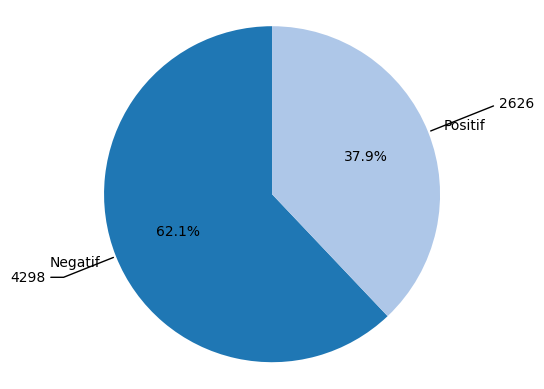

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'datakorupsibaru' is a DataFrame with a 'sentimen' column
labels = list(data_clean['sentimen'].value_counts().index)
sizes = list(data_clean['sentimen'].value_counts().values)

fig1, ax1 = plt.subplots()
# Define a color palette with two blue shades
colors = ['#1f77b4', '#aec7e8']  # Feel free to choose your own shades of blue
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal')

# Add text annotations
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax1.annotate(sizes[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, fontsize=10,
                 arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))
plt.show()


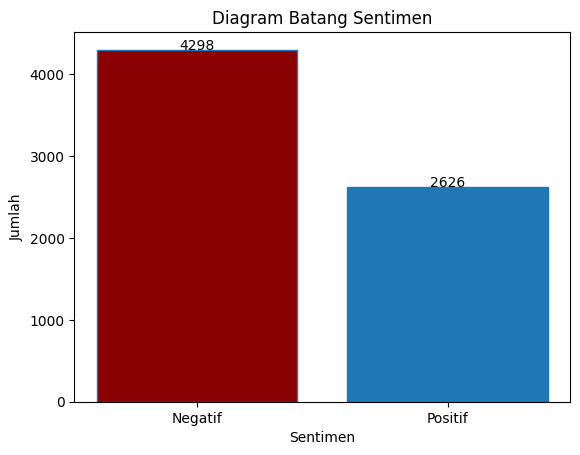

In [ ]:
import matplotlib.pyplot as plt

# Your existing code for sentiment counts
sentimen_counts = data_clean['sentimen'].value_counts()

labels = sentimen_counts.index
values = sentimen_counts.values

# Define two blue colors as a list
colors = ['#8B0000', '#1f77b4']  # Darker blue, Lighter blue

# Use the colors in the bar chart and set the edge color to a darker blue for contrast
plt.bar(labels, values, color=colors, edgecolor='#1f77b4')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Batang Sentimen')

# Add text labels above the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), ha='center')

# Display the plot
plt.show()

In [ ]:
# Load Kategori_korupsi DataFrame
Kategori_korupsi = pd.read_csv('https://raw.githubusercontent.com/rizkyyanuark/testpython/main/Gemastik/kategori_korupsi.csv')

# Initialize an empty list for storing the detected categories
gol_korupsi = []

# Iterate through each row in the data_clean DataFrame
for index, row in data_clean.iterrows():
    text_data = row['data_clean']  # Get the text data from the row
    sentiment = row['sentimen'].lower()  # Get the sentiment from the row and convert to lowercase

    # Check for missing data
    if pd.isna(text_data):
        gol_korupsi.append('Tidak Terdeteksi')
        continue

    # Initialize a variable to track if a category is found
    detected_category = 'Tidak Terdefinisi'

    # Check for each category by matching words from Kategori_korupsi DataFrame
    for category in Kategori_korupsi.columns:
        if any(str(word) in text_data for word in Kategori_korupsi[category].dropna()):
            detected_category = category
            break  # Exit loop once a match is found

    # Append the detected category to the list
    gol_korupsi.append(detected_category)

# Add the detected categories to the data_clean DataFrame
data_clean['gol_korupsi'] = gol_korupsi

# Clean string values in the DataFrame
data_clean = data_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop rows with missing values (if needed)
data_clean = data_clean.dropna()

# Count the occurrences of each category for positive and negative sentiments
count_data = data_clean.groupby(['gol_korupsi', 'sentimen']).size().unstack(fill_value=0)

# Rename the columns for clarity
count_data.columns.name = None
count_data = count_data.rename_axis('gol_korupsi').reset_index()

# Display the updated DataFrame with counts
print(count_data)

         gol_korupsi  Negatif  Positif
0            Ekonomi     3142     2317
1              Hukum      560      125
2      Infrastruktur       76       37
3          Kesehatan       20        8
4         Pendidikan       26        3
5             Sosial       75        9
6          Teknologi       75       28
7  Tidak Terdefinisi      324       99


<ipython-input-5-0709b6fdebb1>:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean = data_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x)


MAPPING GOLONGAN / BIDANG KORUPSI

<Figure size 1200x600 with 0 Axes>

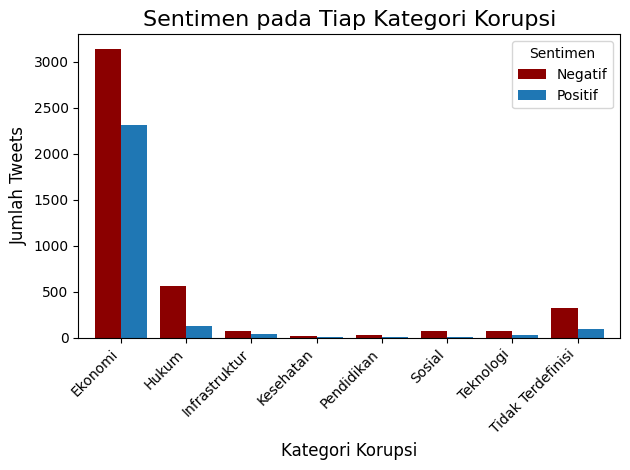

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of Positif and Negatif sentiments for each gol_korupsi category
sentiment_counts = data_clean.groupby(['gol_korupsi', 'sentimen']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='bar', color=['#8B0000', '#1f77b4'], width=0.8)

# Customize the plot
plt.title('Sentimen pada Tiap Kategori Korupsi', fontsize=16)
plt.xlabel('Kategori Korupsi', fontsize=12)
plt.ylabel('Jumlah Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentimen', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


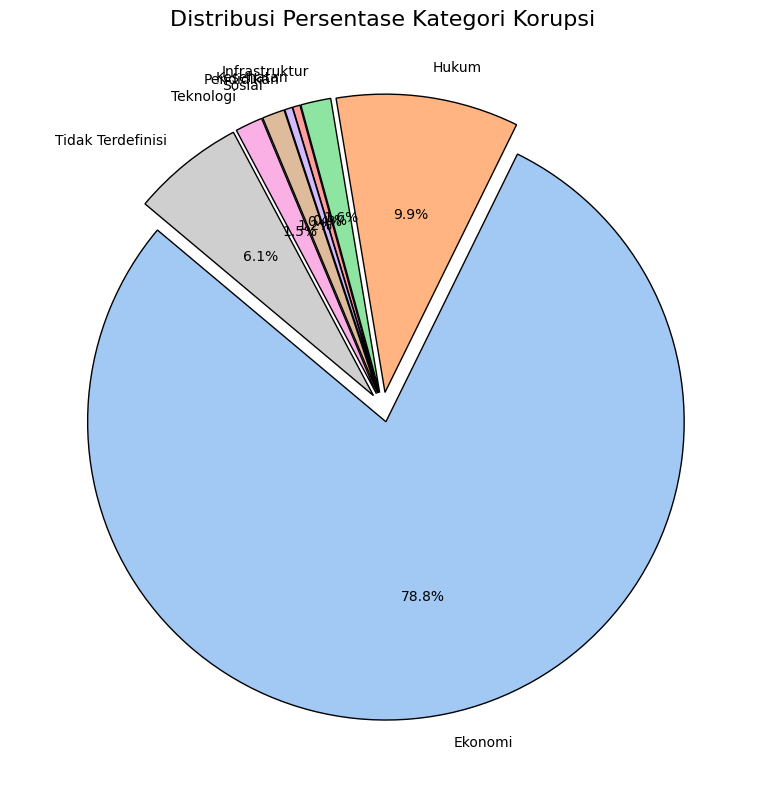

In [ ]:
import matplotlib.pyplot as plt

# Sum the total counts across sentiments for each 'gol_korupsi' category
category_totals = data_clean.groupby('gol_korupsi').size()

# Plotting a pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel', len(category_totals))
explode = [0.05] * len(category_totals)  # Slightly explode all slices for emphasis

# Create the pie chart
plt.pie(
    category_totals,
    labels=category_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)

# Customize the plot
plt.title('Distribusi Persentase Kategori Korupsi', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
data_clean.to_csv('data_scrap_korupsi_labelsentimen_baru_golkorup.csv')

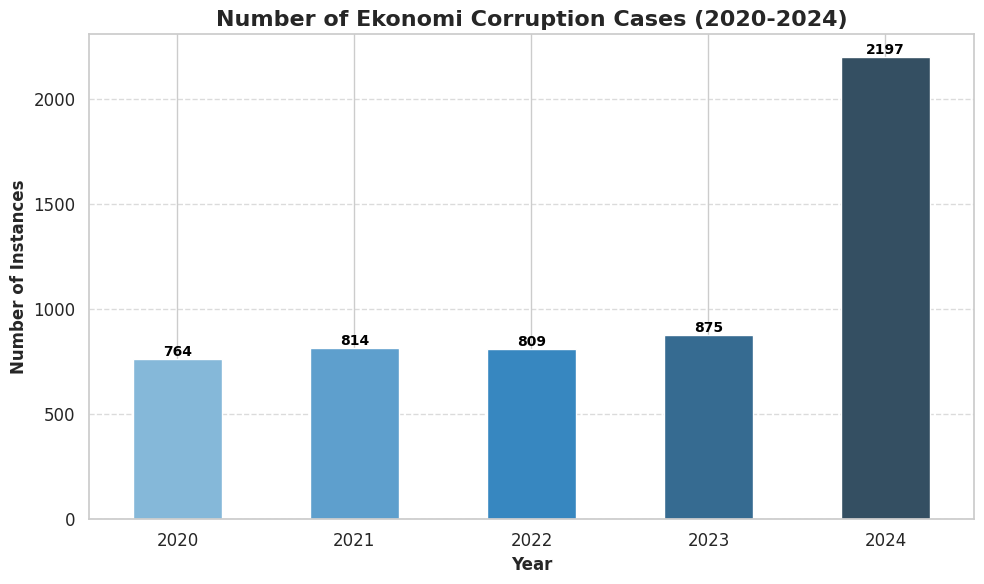

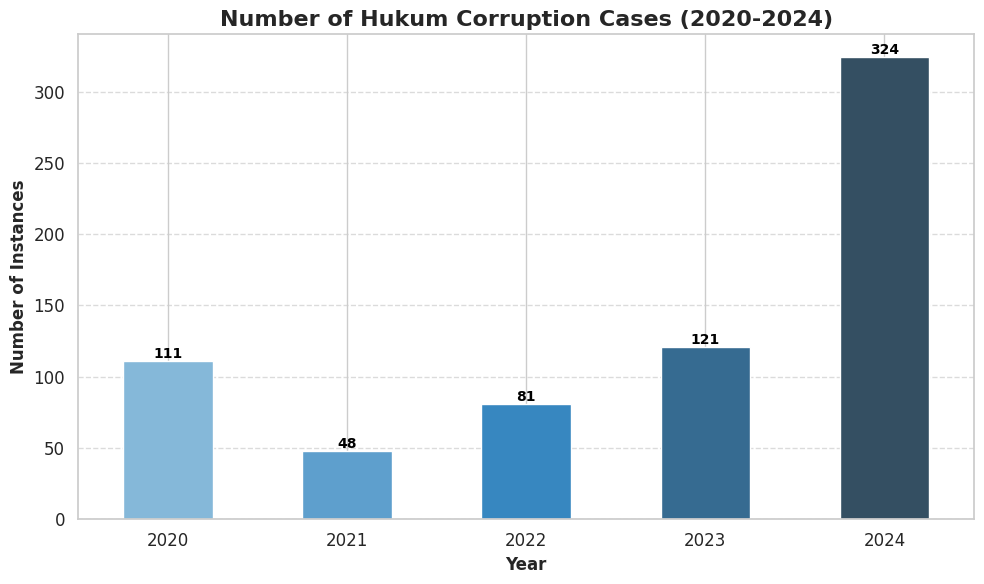

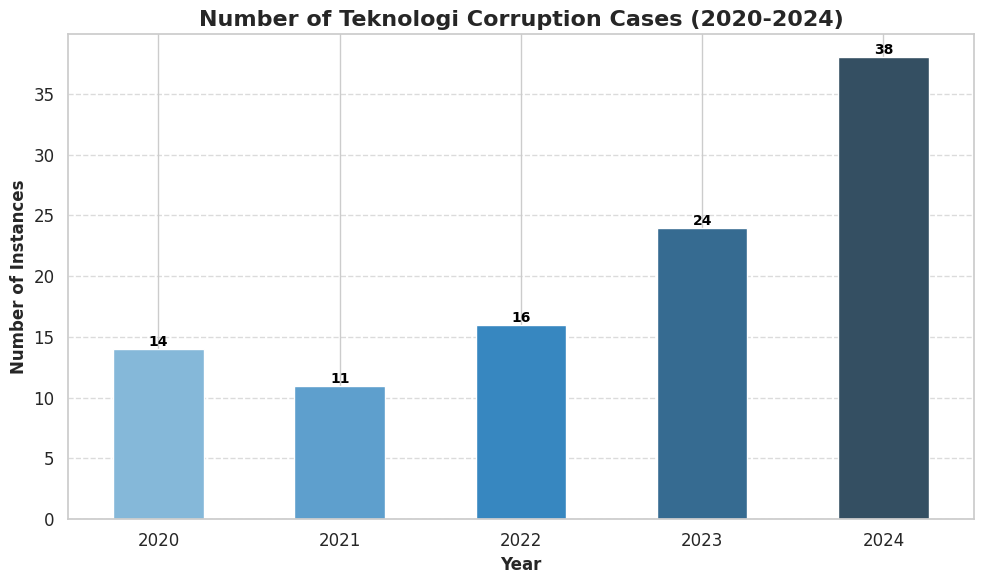

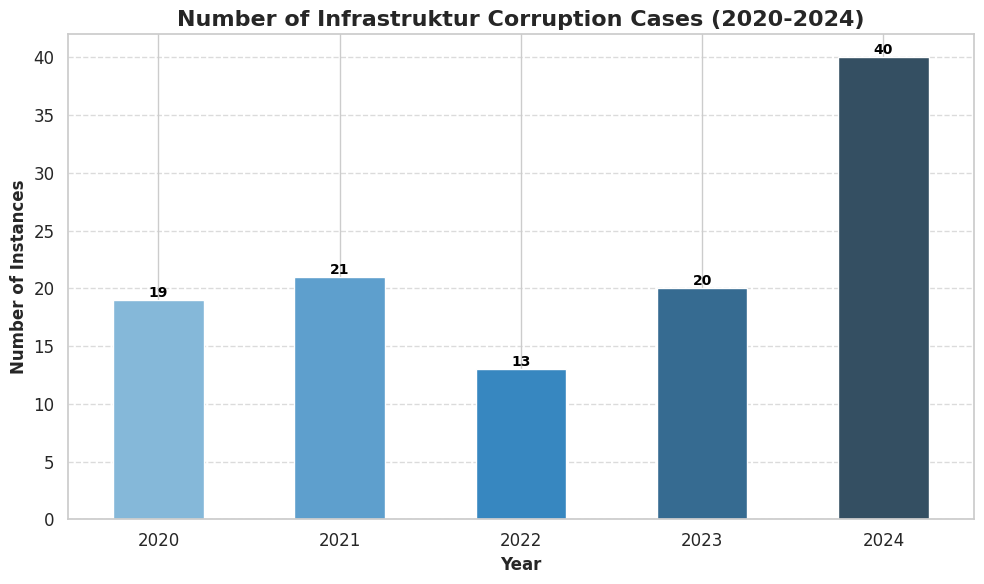

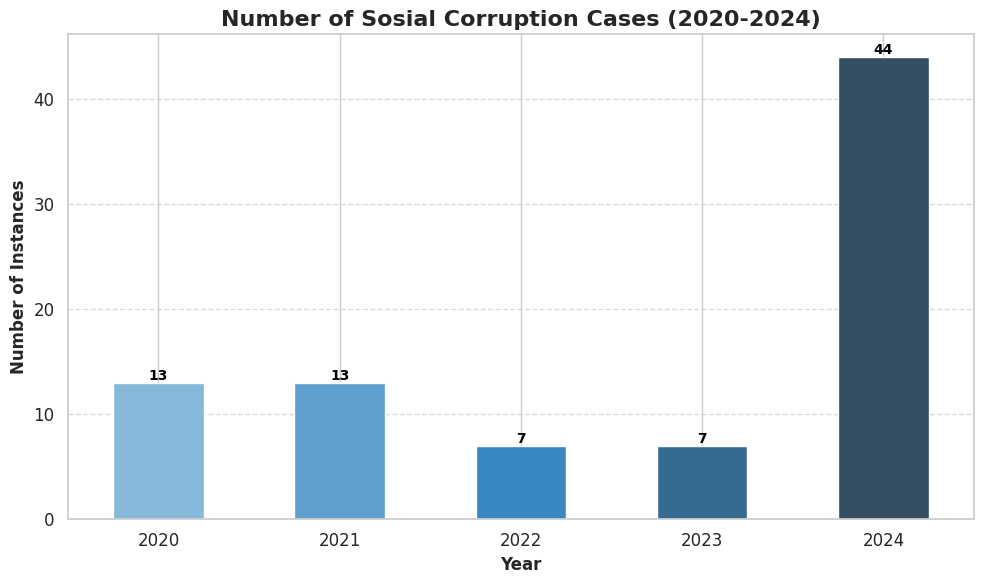

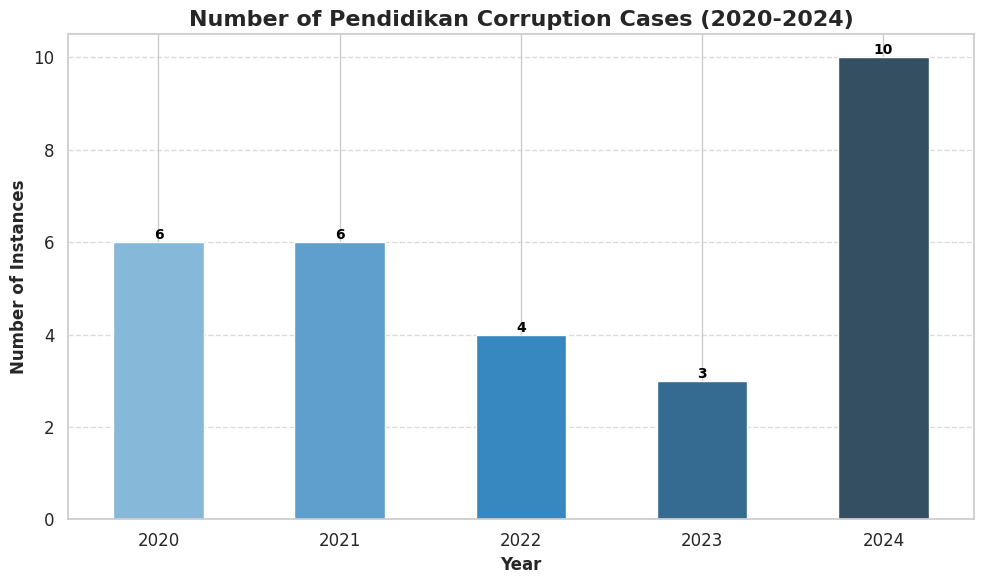

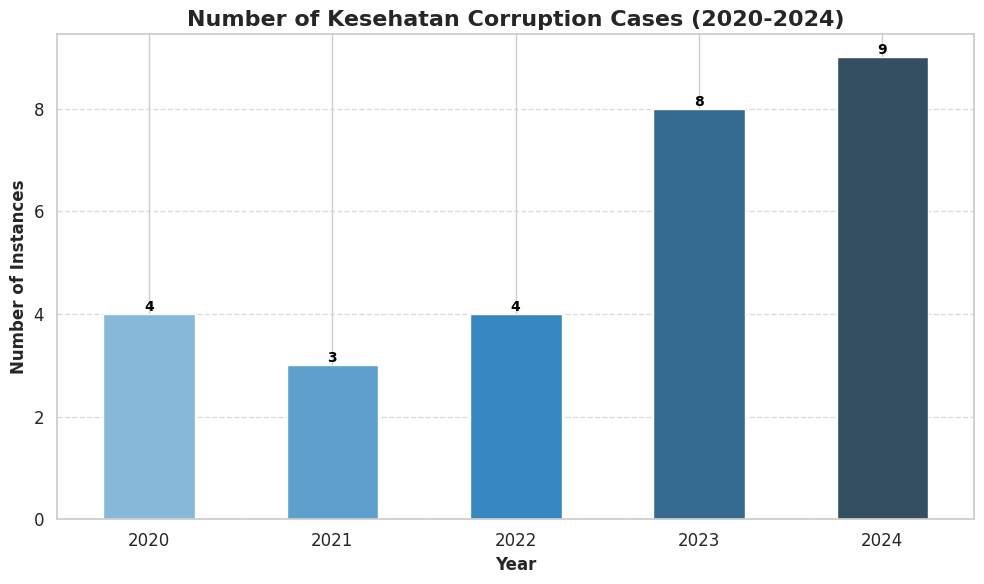

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Convert 'created_at' to datetime format
data_clean['created_at'] = pd.to_datetime(data_clean['created_at'], errors='coerce')

# Filter data for years between 2020 and 2024
data_filtered = data_clean[data_clean['created_at'].dt.year.between(2020, 2024)]

# Group the data by 'gol_korupsi' and year, and count occurrences
data_filtered['year'] = data_filtered['created_at'].dt.year

# List of corruption categories
categories = data_filtered['gol_korupsi'].unique()

# Create a plot for each category
for category in categories:
    if category != 'Tidak Terdefinisi':  # Skip the 'Tidak Terdefinisi' category
        category_data = data_filtered[data_filtered['gol_korupsi'] == category]
        category_by_year = category_data.groupby(['year']).size()

        # Plotting the results for each category with a more advanced style
        plt.figure(figsize=(10, 6))
        ax = category_by_year.plot(kind='bar', color=sns.color_palette("Blues_d", len(category_by_year)))

        # Add title and labels with a more sophisticated style
        plt.title(f'Number of {category} Corruption Cases (2020-2024)', fontsize=16, fontweight='bold')
        plt.xlabel('Year', fontsize=12, fontweight='bold')
        plt.ylabel('Number of Instances', fontsize=12, fontweight='bold')

        # Add count annotations on top of each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        fontsize=10, fontweight='bold',
                        color='black', xytext=(0, 5), textcoords='offset points')

        # Customize x-ticks, grid lines, and layout
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Show plot
        plt.show()


<Figure size 1000x600 with 0 Axes>

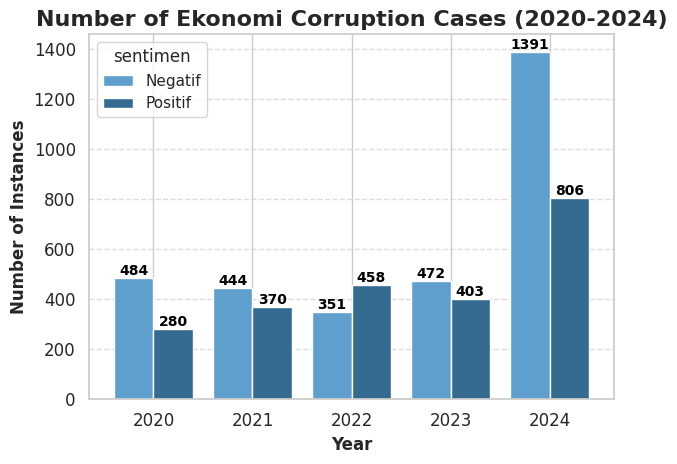

<Figure size 1000x600 with 0 Axes>

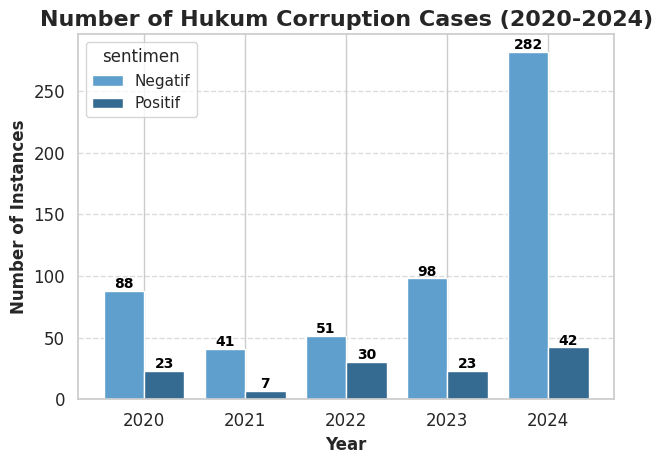

<Figure size 1000x600 with 0 Axes>

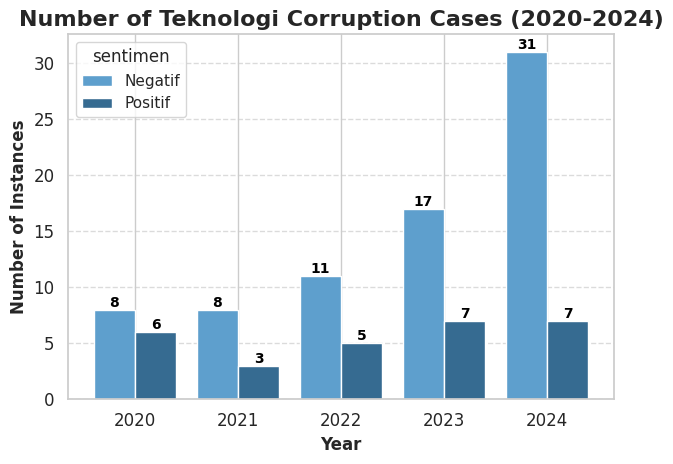

<Figure size 1000x600 with 0 Axes>

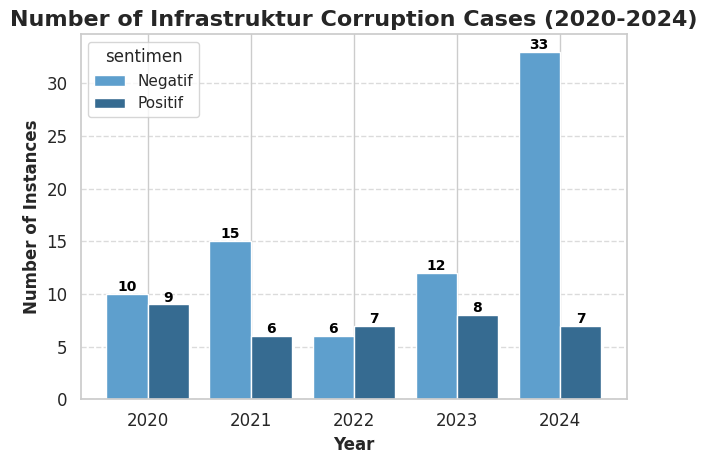

<Figure size 1000x600 with 0 Axes>

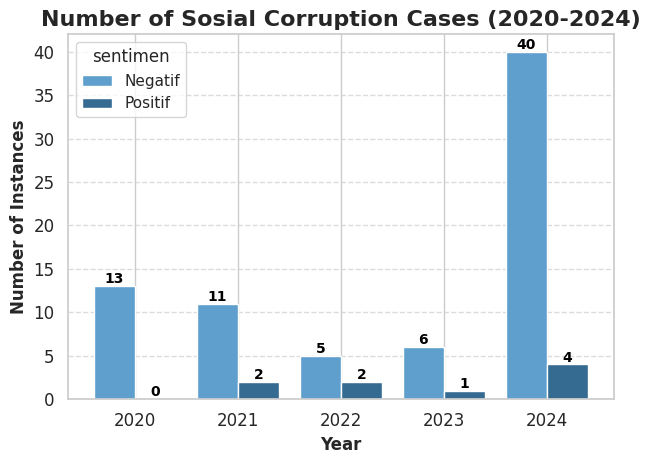

<Figure size 1000x600 with 0 Axes>

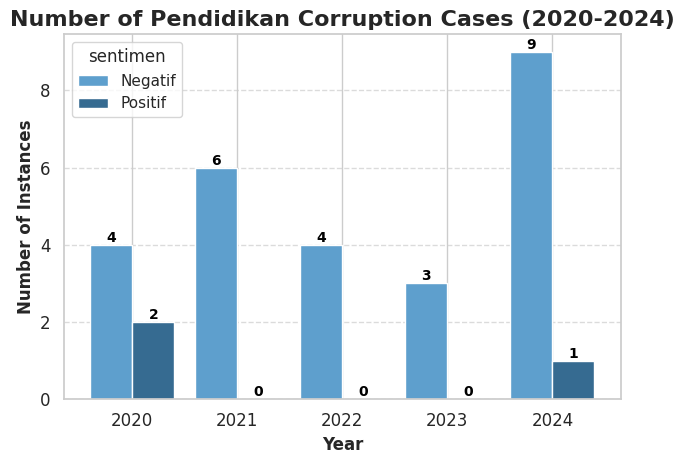

<Figure size 1000x600 with 0 Axes>

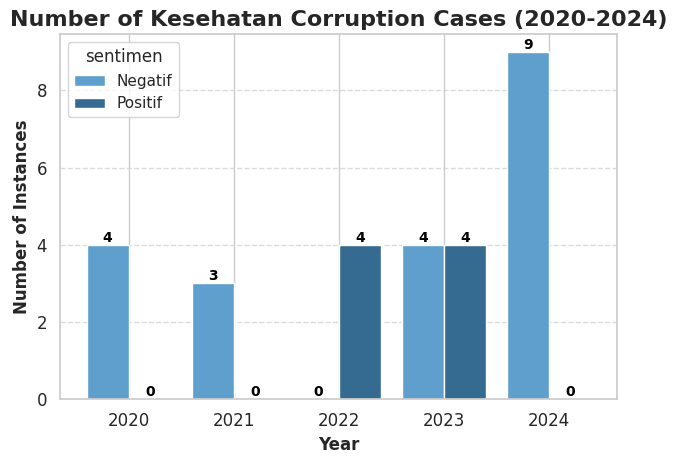

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Convert 'created_at' to datetime format
data_clean['created_at'] = pd.to_datetime(data_clean['created_at'], errors='coerce')

# Filter data for years between 2020 and 2024
data_filtered = data_clean[data_clean['created_at'].dt.year.between(2020, 2024)]

# Group the data by 'gol_korupsi', year, and sentiment, and count occurrences
data_filtered['year'] = data_filtered['created_at'].dt.year

# List of corruption categories
categories = data_filtered['gol_korupsi'].unique()

# Create a plot for each category
for category in categories:
    if category != 'Tidak Terdefinisi':  # Skip the 'Tidak Terdefinisi' category
        category_data = data_filtered[data_filtered['gol_korupsi'] == category]

        # Group by 'year' and 'sentimen' and count occurrences
        category_by_year_sentiment = category_data.groupby(['year', 'sentimen']).size().unstack(fill_value=0)

        # Plotting the results for each category with a more advanced style
        plt.figure(figsize=(10, 6))
        ax = category_by_year_sentiment.plot(kind='bar', width=0.8, color=sns.color_palette("Blues_d", 2))

        # Add title and labels with a more sophisticated style
        plt.title(f'Number of {category} Corruption Cases (2020-2024)', fontsize=16, fontweight='bold')
        plt.xlabel('Year', fontsize=12, fontweight='bold')
        plt.ylabel('Number of Instances', fontsize=12, fontweight='bold')

        # Add count annotations on top of each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        fontsize=10, fontweight='bold',
                        color='black', xytext=(0, 5), textcoords='offset points')

        # Customize x-ticks, grid lines, and layout
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Show plot
        plt.show()


<Figure size 1000x600 with 0 Axes>

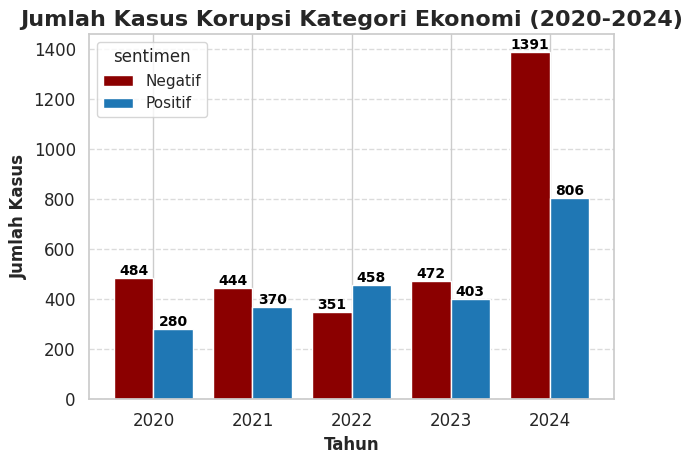

<Figure size 1000x600 with 0 Axes>

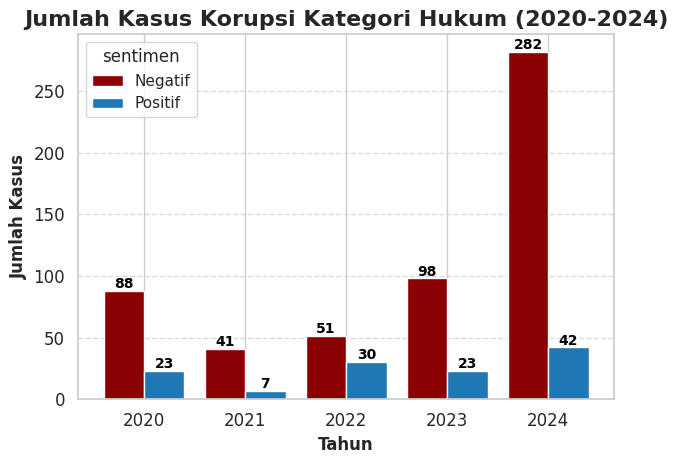

<Figure size 1000x600 with 0 Axes>

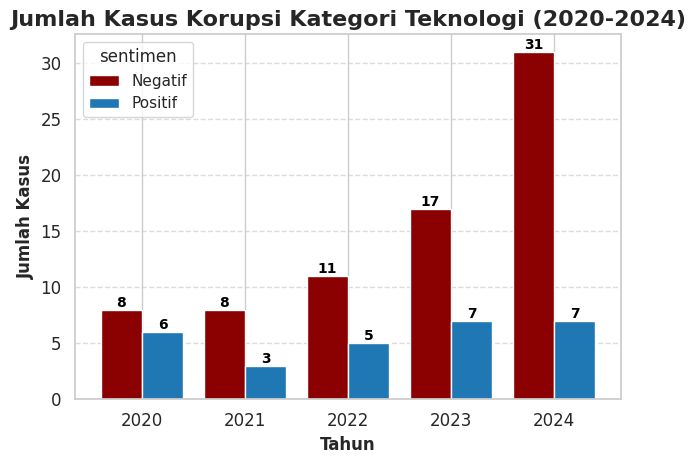

<Figure size 1000x600 with 0 Axes>

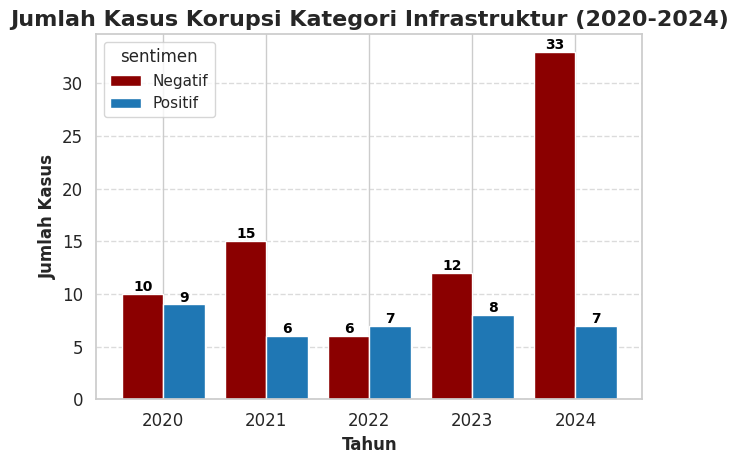

<Figure size 1000x600 with 0 Axes>

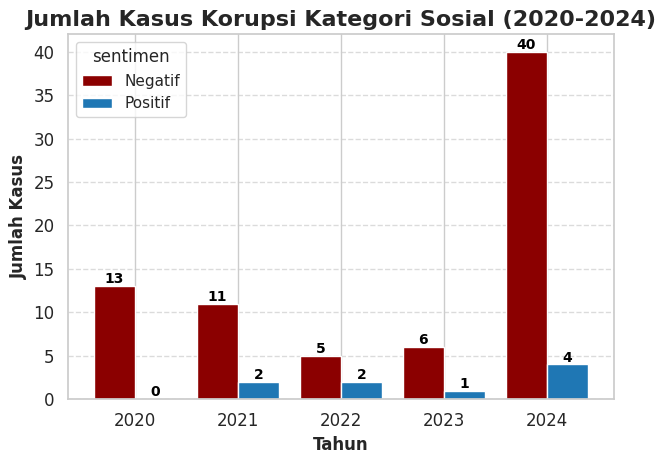

<Figure size 1000x600 with 0 Axes>

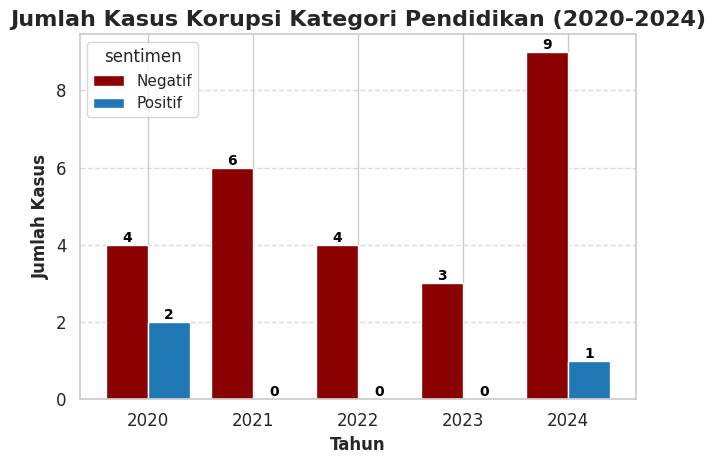

<Figure size 1000x600 with 0 Axes>

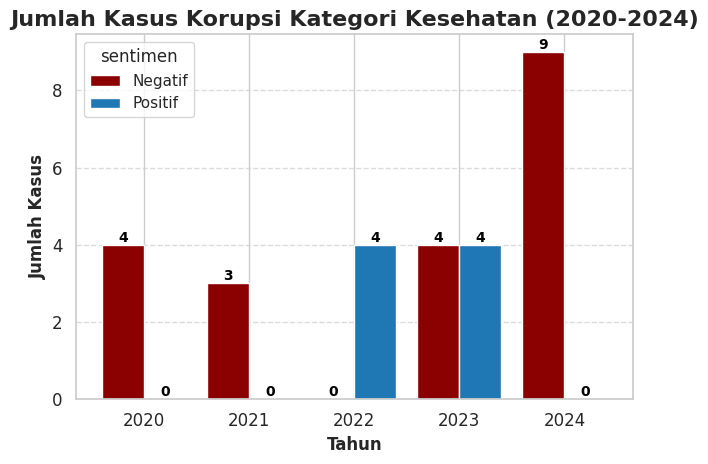

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Convert 'created_at' to datetime format
data_clean['created_at'] = pd.to_datetime(data_clean['created_at'], errors='coerce')

# Filter data for years between 2020 and 2024
data_filtered = data_clean[data_clean['created_at'].dt.year.between(2020, 2024)]

# Group the data by 'gol_korupsi', year, and sentiment, and count occurrences
data_filtered['year'] = data_filtered['created_at'].dt.year

# List of corruption categories
categories = data_filtered['gol_korupsi'].unique()

# Create a plot for each category
for category in categories:
    if category != 'Tidak Terdefinisi':  # Skip the 'Tidak Terdefinisi' category
        category_data = data_filtered[data_filtered['gol_korupsi'] == category]

        # Group by 'year' and 'sentimen' and count occurrences
        category_by_year_sentiment = category_data.groupby(['year', 'sentimen']).size().unstack(fill_value=0)

        # Plotting the results for each category with a more advanced style
        plt.figure(figsize=(10, 6))

        # Define colors: dark red for positive and blue for negative
        color_palette = ['#8B0000', '#1f77b4']  # Dark Red for Positif, Blue for Negatif

        # Plot the bar chart with specified colors
        ax = category_by_year_sentiment.plot(kind='bar', width=0.8, color=color_palette)

        # Add title and labels in Indonesian
        plt.title(f'Jumlah Kasus Korupsi Kategori {category} (2020-2024)', fontsize=16, fontweight='bold')
        plt.xlabel('Tahun', fontsize=12, fontweight='bold')
        plt.ylabel('Jumlah Kasus', fontsize=12, fontweight='bold')

        # Add count annotations on top of each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        fontsize=10, fontweight='bold',
                        color='black', xytext=(0, 5), textcoords='offset points')

        # Customize x-ticks, grid lines, and layout
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Show plot
        plt.show()
